## Fashion-mnistを使ったDeep Learning

In [1]:
# kerasをimportします(tensorflowのverも確認)
from __future__ import absolute_import, division, print_function, unicode_literals
 
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
 
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
 
print(tf.__version__)

1.13.1


In [2]:
!pip install seaborn

    100% |████████████████████████████████| 215kB 27.0MB/s ta 0:00:01
You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
# データのロードを実施
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# ラベル名を定義する
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# imageデータ（学習）の形を確認する
train_images.shape

(60000, 28, 28)

In [6]:
# ラベルデータ（学習）の形を確認する
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
# imageデータ（テスト）の形を確認する
test_images.shape

(10000, 28, 28)

In [8]:
# ラベルデータ（テスト）の形を確認する
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

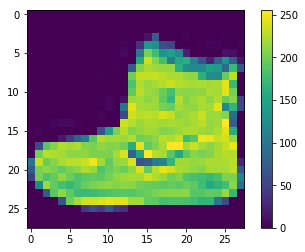

In [9]:
# 画像を表示してみる(1番目の画像)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

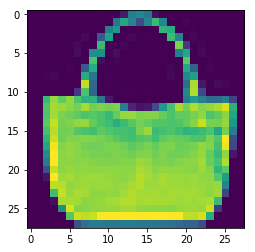

In [10]:
# 画像を表示してみる(100番目の画像)
plt.imshow(train_images[100])
plt.show()

In [11]:
# 0-255の整数値を0〜1の小数に変換する(正規化)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0

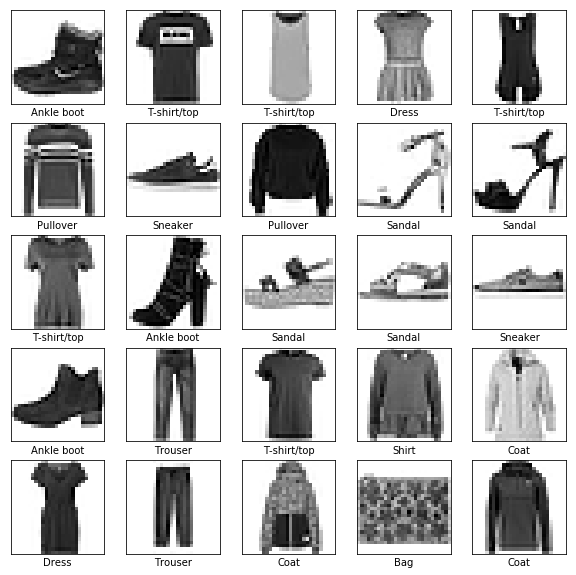

In [12]:
# input画像とラベルとラベル名がそれぞれ正確に紐づいていることを出力して確認する
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## ■ シンプルなニューラルネットワークを実行する (下記 P.67~72あたりを参照)
https://drive.google.com/file/d/1COk-yN6kZhwGjWCfEsp1E4V0ST8toYj4/view)

In [13]:
# モデルの定義
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
# optimixerと評価手法の設定
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# 実際に実行してみるとtestデータで90%程度
result = model.fit(train_images, train_labels,
                batch_size=128,
                epochs=20,
                verbose=1,
                validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 286us/sample - loss: 0.5569 - acc: 0.8085 - val_loss: 0.4883 - val_acc: 0.8235
Epoch 2/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4045 - acc: 0.8603 - val_loss: 0.4238 - val_acc: 0.8518
Epoch 3/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3661 - acc: 0.8701 - val_loss: 0.3935 - val_acc: 0.8603
Epoch 4/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3379 - acc: 0.8786 - val_loss: 0.3756 - val_acc: 0.8670
Epoch 5/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.3193 - acc: 0.8842 - val_loss: 0.3726 - val_acc: 0.8634
Epoch 6/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.3032 - acc: 0.8898 - val_loss: 0.3623 - val_acc: 0.8715
Epoch 7/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2903 - acc: 0.8948 - val_loss: 

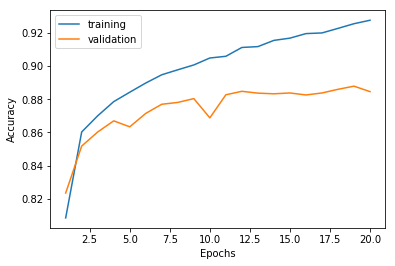

In [16]:
%matplotlib inline
 
plt.plot(range(1, 21), result.history['acc'], label="training")
plt.plot(range(1, 21), result.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import confusion_matrix
 
predict_classes = model.predict_classes(test_images)
true_classes = test_labels
print(confusion_matrix(true_classes, predict_classes))


[[852   3  12  15   5   1 101   0  11   0]
 [  1 983   0   8   5   0   1   0   2   0]
 [ 18   1 785   7 113   0  73   0   3   0]
 [ 23  16  14 838  74   0  26   0   9   0]
 [  0   1  85   9 843   2  53   0   7   0]
 [  0   0   0   0   0 968   0  17   2  13]
 [118   1  80  17  81   0 688   0  15   0]
 [  0   0   0   0   0  21   0 955   2  22]
 [  3   0   2   2   5   3   2   3 980   0]
 [  0   1   0   0   0   7   1  37   0 954]]


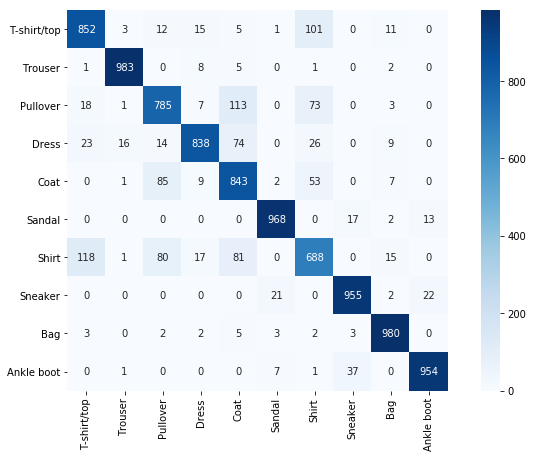

In [19]:
import seaborn as sn
import pandas as pd
def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=class_names, columns=class_names)
 
    plt.figure(figsize = (12,7))
    sn.heatmap(df_cmx, annot=True, fmt='g' ,square = True,cmap="Blues",)
    plt.show()
 
print_cmx(true_classes, predict_classes)

## ■ DeepLearning(CNN)で実行する(下記 P.39~41あたりを参照)
https://drive.google.com/file/d/1COk-yN6kZhwGjWCfEsp1E4V0ST8toYj4/view

In [40]:
# チャネルの追加
X_train = train_images.reshape(train_images.shape + (1,))
X_test = test_images.reshape(test_images.shape + (1,))

In [41]:
# モデルの定義
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [42]:
# optimizerと評価手法の設定
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
# 実際に実行してみるとtestデータで91~93%程度
result = model.fit(X_train, train_labels,
                batch_size=128,
                epochs=20,
                verbose=1,
                validation_data=(X_test, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 54s 894us/step - loss: 0.5822 - acc: 0.7864 - val_loss: 0.3799 - val_acc: 0.8606
Epoch 2/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.3672 - acc: 0.8666 - val_loss: 0.3017 - val_acc: 0.8914
Epoch 3/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.3149 - acc: 0.8846 - val_loss: 0.2685 - val_acc: 0.9014
Epoch 4/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.2840 - acc: 0.8957 - val_loss: 0.2520 - val_acc: 0.9080
Epoch 5/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.2604 - acc: 0.9053 - val_loss: 0.2444 - val_acc: 0.9104
Epoch 6/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.2497 - acc: 0.9069 - val_loss: 0.2332 - val_acc: 0.9167
Epoch 7/20
60000/60000 [==============================] - 10s 168us/

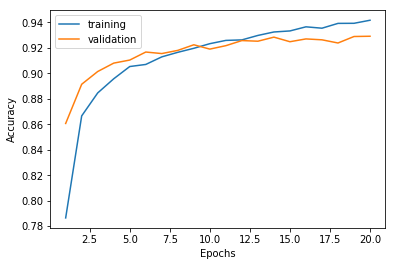

In [44]:
%matplotlib inline
 
plt.plot(range(1, 21), result.history['acc'], label="training")
plt.plot(range(1, 21), result.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [47]:
from sklearn.metrics import confusion_matrix
 
predict_classes = model.predict_classes(X_test)
true_classes = test_labels
print(confusion_matrix(true_classes, predict_classes))


[[889   0  18   8   2   2  76   0   5   0]
 [  0 989   0   5   1   0   3   0   2   0]
 [ 14   1 914   5  30   0  34   0   2   0]
 [ 12   6  13 915  27   0  25   0   2   0]
 [  0   0  51  15 889   0  45   0   0   0]
 [  0   0   0   0   0 983   0   8   0   9]
 [ 93   0  50  16  53   0 781   0   7   0]
 [  0   0   0   0   0   3   0 982   0  15]
 [  3   0   1   3   2   1   0   1 989   0]
 [  0   0   0   0   0   5   0  35   0 960]]


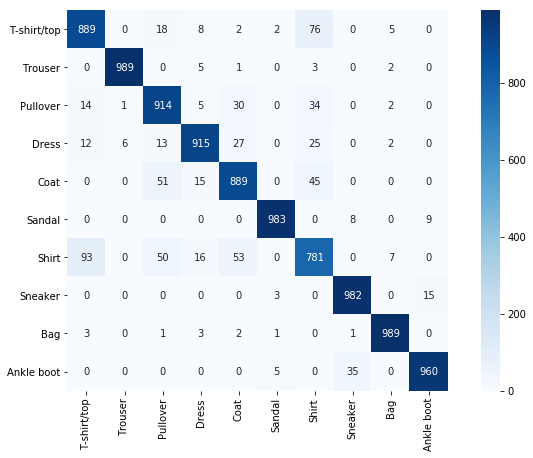

In [48]:
import seaborn as sn

def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=class_names, columns=class_names)
 
    plt.figure(figsize = (12,7))
    sn.heatmap(df_cmx, annot=True, fmt='g' ,square = True,cmap="Blues",)
    plt.show()
 
print_cmx(true_classes, predict_classes)

## ■ 最適化手法やパラメーターを少しいじってみる

In [58]:
# RMSpropを使い、dropoutなどを調整
# Epoch 10回で実行してみた結果（精度良くない、実際に実行しなくてよい）
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

# one-hot vector形式に変換する
from keras.utils import np_utils
Y_train = np_utils.to_categorical(train_labels, 10)
Y_test = np_utils.to_categorical(test_labels, 10)

from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-4),
              metrics=['acc'])
result = model.fit(X_train, Y_train,
                batch_size=32,
                epochs=10,
                verbose=1,
                validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 30s 502us/step - loss: 0.5031 - acc: 0.8213 - val_loss: 0.3533 - val_acc: 0.8767
Epoch 2/10
60000/60000 [==============================] - 29s 484us/step - loss: 0.3257 - acc: 0.8851 - val_loss: 0.2915 - val_acc: 0.8950
Epoch 3/10
60000/60000 [==============================] - 29s 484us/step - loss: 0.2771 - acc: 0.9008 - val_loss: 0.2685 - val_acc: 0.9060
Epoch 4/10
60000/60000 [==============================] - 29s 484us/step - loss: 0.2516 - acc: 0.9099 - val_loss: 0.2461 - val_acc: 0.9132
Epoch 5/10
60000/60000 [==============================] - 29s 483us/step - loss: 0.2371 - acc: 0.9166 - val_loss: 0.2417 - val_acc: 0.9157
Epoch 6/10
60000/60000 [==============================] - 29s 482us/step - loss: 0.2287 - acc: 0.9196 - val_loss: 0.2794 - val_acc: 0.9156
Epoch 7/10
60000/60000 [==============================] - 29s 484us/step - loss: 0.2224 - acc: 0.9216 - val_loss: 0.

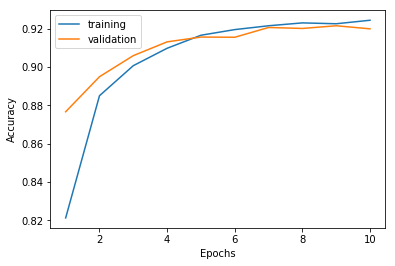

In [59]:
%matplotlib inline
 
plt.plot(range(1, 11), result.history['acc'], label="training")
plt.plot(range(1, 11), result.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


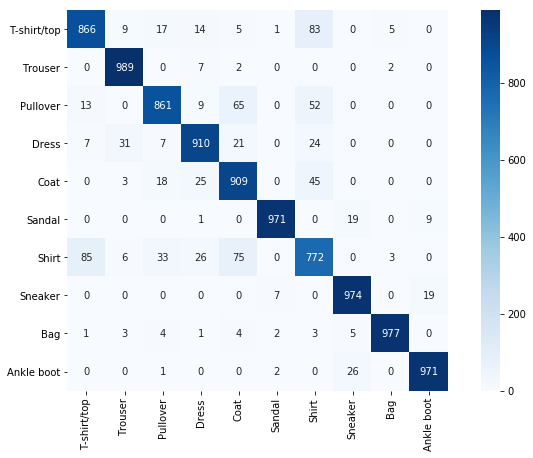

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
 
predict_classes = model.predict_classes(X_test)
true_classes = test_labels

def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=class_names, columns=class_names)
 
    plt.figure(figsize = (12,7))
    sn.heatmap(df_cmx, annot=True, fmt='g' ,square = True,cmap="Blues",)
    plt.show()
 
print_cmx(true_classes, predict_classes)

### ちなみにDeeplearningを使わない手法であればこちらを参考に
http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/

## ■ Dropout層を外して実行する (下記 P.42~45あたりを参照)
https://drive.google.com/file/d/1COk-yN6kZhwGjWCfEsp1E4V0ST8toYj4/view?usp=sharing

In [61]:
# モデルの定義
# trainのACCが 100%に近づいていることを確認してもらいたい 、testのACCは向上していない(過学習)
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# optimizerと評価手法の設定
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 実際に実行してみるとtestデータで90%程度
result = model.fit(X_train, train_labels,
                batch_size=128,
                epochs=20,
                verbose=1,
                validation_data=(X_test, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.4822 - acc: 0.8268 - val_loss: 0.3540 - val_acc: 0.8721
Epoch 2/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.2848 - acc: 0.8973 - val_loss: 0.2947 - val_acc: 0.8910
Epoch 3/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.2323 - acc: 0.9159 - val_loss: 0.2811 - val_acc: 0.8992
Epoch 4/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.2029 - acc: 0.9271 - val_loss: 0.2355 - val_acc: 0.9132
Epoch 5/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.1766 - acc: 0.9361 - val_loss: 0.2394 - val_acc: 0.9160
Epoch 6/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.1545 - acc: 0.9440 - val_loss: 0.2315 - val_acc: 0.9193
Epoch 7/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.1336 - acc: 0.9515 - val_loss: 0.2276 -

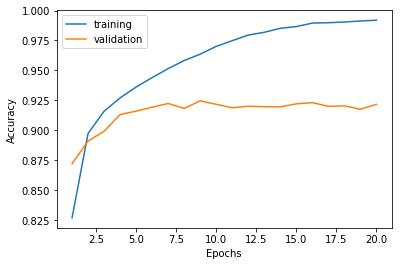

In [62]:
%matplotlib inline
 
plt.plot(range(1, 21), result.history['acc'], label="training")
plt.plot(range(1, 21), result.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## ■ Kerasのapplication modelを使ってみる
https://keras.io/ja/applications/

In [106]:
from keras.applications.densenet import DenseNet121
from keras.preprocessing import image
from keras.models import Model
from keras import models
from keras import layers

base_model = DenseNet121(weights='imagenet', include_top=False,  input_shape = (32, 32, 3))

top_model = models.Sequential()
top_model.add(layers.Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(layers.Dense(128, activation='relu'))
top_model.add(layers.Dropout(0.4))
top_model.add(layers.Dense(10, activation='softmax'))

model = Model(inputs=base_model.input, outputs=top_model(base_model.output))

# 115層以降の重みは変更する
for layer in base_model.layers[:116]:
    layer.trainable = False
    
    if layer.name.startswith('batch_normalization'):
        layer.trainable = True

for layer in model.layers[116:]:
    layer.trainable = True

In [107]:
# optimizerと評価手法の設定
adam = optimizers.Adam(lr=5E-4,beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [108]:
# 32x32以上じゃないと読み込んでくれないので、無理やり 0 padding あとRGB(3チャンネル)
X_train_app = np.pad(X_train,[(0,0),(2,2),(2,2),(0,2)],"constant")
X_test_app = np.pad(X_test,[(0,0),(2,2),(2,2),(0,2)],"constant")

In [109]:
# 実際に実行してみると...(時間かかるでのepoch減らすこと)
result = model.fit(X_train_app, train_labels,
                batch_size=100,
                epochs=20,
                verbose=1,
                validation_data=(X_test_app, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 240s 4ms/step - loss: 0.4382 - acc: 0.8517 - val_loss: 1.8187 - val_acc: 0.4708
Epoch 2/20
60000/60000 [==============================] - 105s 2ms/step - loss: 0.2675 - acc: 0.9068 - val_loss: 2.4107 - val_acc: 0.5870
Epoch 3/20
60000/60000 [==============================] - 104s 2ms/step - loss: 0.2347 - acc: 0.9169 - val_loss: 2.0232 - val_acc: 0.5033
Epoch 4/20
60000/60000 [==============================] - 104s 2ms/step - loss: 0.1968 - acc: 0.9301 - val_loss: 1.9178 - val_acc: 0.5605
Epoch 5/20
60000/60000 [==============================] - 104s 2ms/step - loss: 0.1765 - acc: 0.9364 - val_loss: 2.3627 - val_acc: 0.5286
Epoch 6/20
60000/60000 [==============================] - 105s 2ms/step - loss: 0.1658 - acc: 0.9408 - val_loss: 2.1883 - val_acc: 0.5651
Epoch 7/20
60000/60000 [==============================] - 105s 2ms/step - loss: 0.1490 - acc: 0.9462 - val_loss: 3.2492 - 

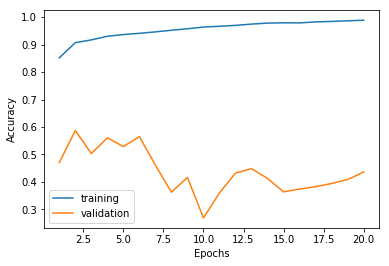

In [110]:
%matplotlib inline
 
plt.plot(range(1, 21), result.history['acc'], label="training")
plt.plot(range(1, 21), result.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## ■ ローテートなどのAugmentationを使う